In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv('../input/videogamesales/vgsales.csv')
data.drop(['Rank'], axis=1, inplace=True)
data['Year'] = data['Year'].fillna(2009.0)

# Which game has highest Global Sales? ----> Wii Sports

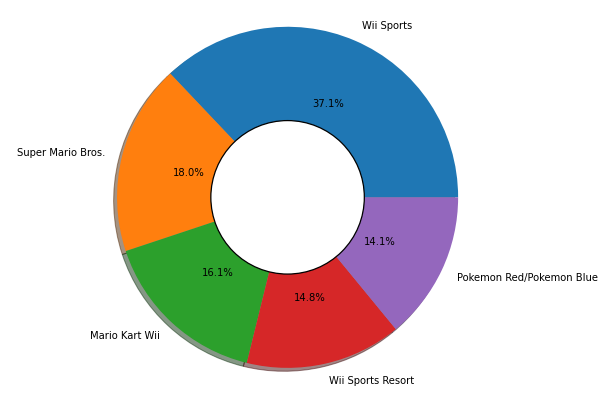

In [2]:
game = data.loc[:,['Name','Global_Sales']]
game = game.sort_values('Global_Sales', ascending=False)
game = game.head()

fig = plt.figure(figsize=(10,7))
plt.pie(game['Global_Sales'], labels=game['Name'], autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

# Top 5 platforms per year

In [3]:
top_5_platforms = ['DS', 'PS2', 'PS3', 'Wii', 'X360']
perc = data.loc[:,["Year","Platform",'Global_Sales']]
perc['total_sales'] = perc.groupby([perc.Platform,perc.Year])['Global_Sales'].transform('sum')
perc.drop('Global_Sales', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc[(perc['Year'].astype('float')>=2006.0) & (perc['Year'].astype('float')<=2011.0)]
perc = perc.sort_values("Year",ascending = False)
perc = perc.loc[perc['Platform'].isin(top_5_platforms)]
perc = perc.sort_values("Year")
fig=px.bar(perc,x='Platform', y="total_sales", animation_frame="Year", 
           animation_group="Platform", color="Platform", hover_name="Platform")
fig.show()

# Which years saw highest game launches?  ----> 2007-2010

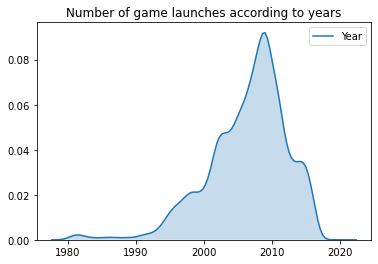

In [4]:
sns.kdeplot(data=data['Year'], label='Year', shade=True)
plt.title('Number of game launches according to years')
plt.show()

# Relation of Global_sales with year ---> One outlier noticed

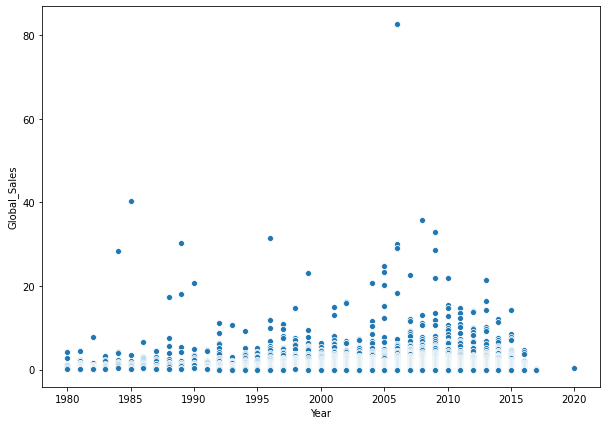

In [5]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data, x='Year', y='Global_Sales')
plt.show()

# Which genre of games have highest sales? ----> Sports

In [6]:
genre = data.loc[:,['Genre','Global_Sales']]
genre['total_sales'] = genre.groupby('Genre')['Global_Sales'].transform('sum')
genre.drop('Global_Sales', axis=1, inplace=True)
genre = genre.drop_duplicates()

fig = px.pie(genre, names='Genre', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.06,0.06,0.06,0.06], textinfo="percent+label")
fig.show()

# Which Publisher of games have highest sales? ---> Nintendo

In [7]:
publisher = data.loc[:,['Publisher','Global_Sales']]
publisher['total_sales'] = publisher.groupby('Publisher')['Global_Sales'].transform('sum')
publisher.drop('Global_Sales', axis=1, inplace=True)
publisher = publisher.drop_duplicates()
publisher = publisher.head(10)

fig = px.pie(publisher, names='Publisher', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.1,0.1,0.1,0.1], textinfo="percent+label")
fig.show()

# Top 5 publishers per year

In [8]:
top_5_publishers = ['Nintendo', 'Electronic Arts', 'Activision', 'Ubisoft', 'Sony Computer Entertainment']
perc = data.loc[:,["Year","Publisher",'Global_Sales']]
perc['total_sales'] = perc.groupby([perc.Publisher,perc.Year])['Global_Sales'].transform('sum')
perc.drop('Global_Sales', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc[(perc['Year'].astype('float')>=2006.0)]
perc = perc.sort_values("Year",ascending = False)
perc = perc.loc[perc['Publisher'].isin(top_5_publishers)]
perc = perc.sort_values("Year")
fig=px.bar(perc,x='Publisher', y="total_sales", animation_frame="Year", 
           animation_group="Publisher", color="Publisher", hover_name="Publisher")
fig.show()

# Which sales range is most games in? ---> (0-10)(in millions)

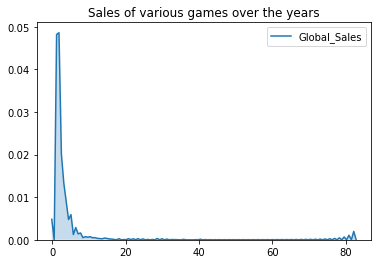

In [9]:
sns.kdeplot(data=data['Global_Sales'], label='Global_Sales', shade=True)
plt.title('Sales of various games over the years')
plt.show()

# Top 5 games for each Genre

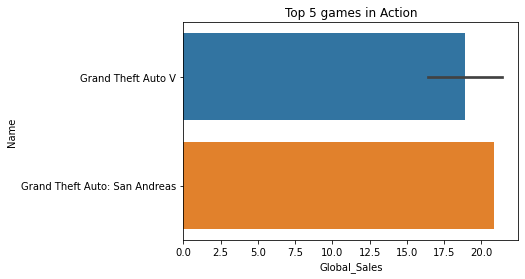

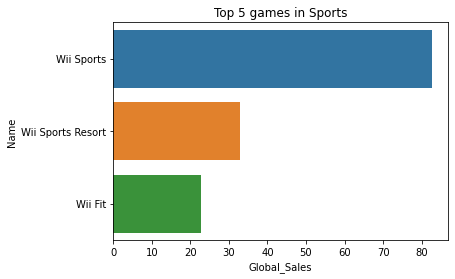

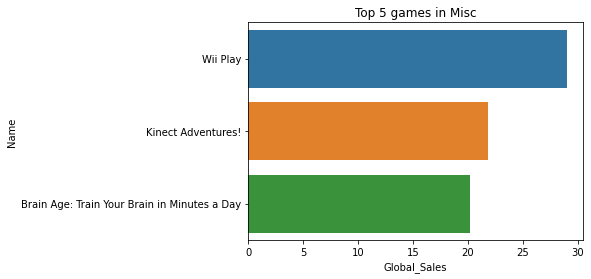

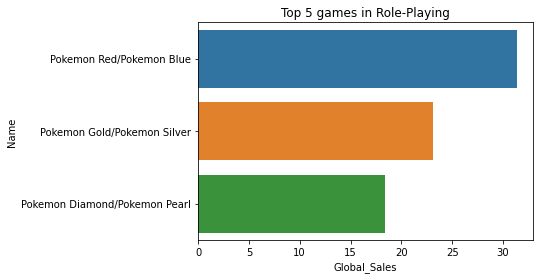

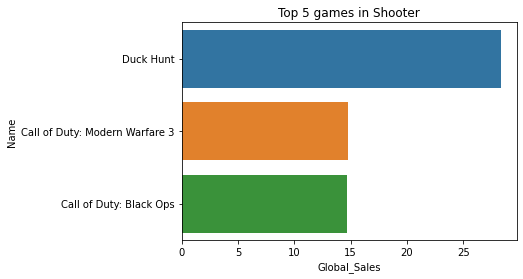

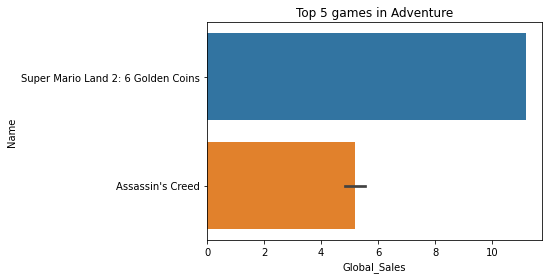

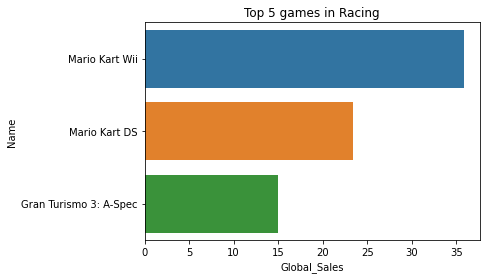

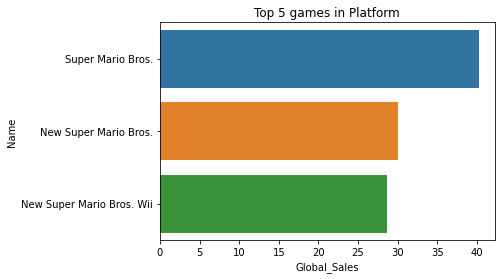

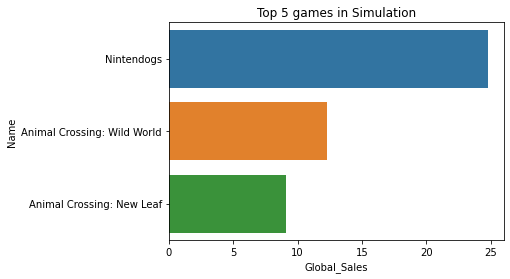

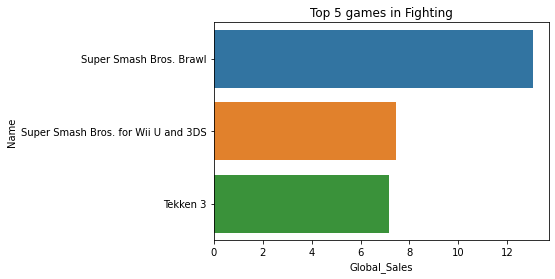

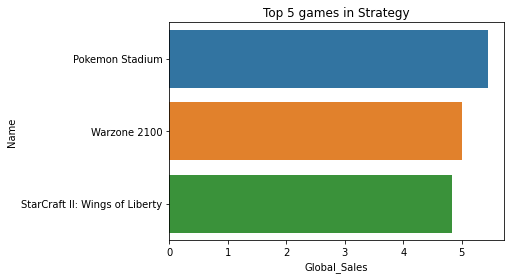

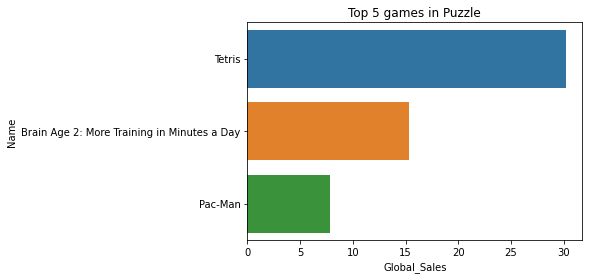

In [10]:
genres = data['Genre'].value_counts().reset_index()['index'].tolist()

for genre,num in zip(genres,range(1,13)):
    df = data[data['Genre']==genre]
    df = df.sort_values('Global_Sales', ascending=False)
    df = df.head(3)
    plt.figure()
    sns.barplot(data=df, x='Global_Sales', y='Name')
    plt.title('Top 5 games in {}'.format(genre))
    plt.show()

# Most popular game in North America ---> Super Mario Bros.

In [11]:
game = data.loc[data['Name']!='Wii Sports',['Name','NA_Sales']]
game = game.sort_values('NA_Sales', ascending=False)
game = game.head()

fig = px.pie(game, names='Name', values='NA_Sales', template='seaborn')
fig.update_traces(rotation=90, pull=0.06, textinfo="percent+label")
fig.show()

# Most popular platform in North America ---> X360

In [12]:
platform = data.loc[data['Name']!='Wii Sports',['Platform','NA_Sales']]
platform['total_sales'] = platform.groupby('Platform')['NA_Sales'].transform('sum')
platform.drop('NA_Sales', axis=1, inplace=True)
platform = platform.drop_duplicates()
platform = platform.sort_values('total_sales', ascending=False)
platform = platform.head()

fig = px.pie(platform, names='Platform', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=0.06, textinfo="percent+label")
fig.show()

# Most popular Genre in North America ---> Action

In [13]:
genre = data.loc[data['Name']!='Wii Sports',['Genre','NA_Sales']]
genre['total_sales'] = genre.groupby('Genre')['NA_Sales'].transform('sum')
genre.drop('NA_Sales', axis=1, inplace=True)
genre = genre.drop_duplicates()
genre = genre.sort_values('total_sales', ascending=False)
genre = genre.head()

fig = px.pie(genre, names='Genre', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=0.06, textinfo="percent+label")
fig.show()

# Most popular publisher in North America ---> Nintendo

In [14]:
publisher = data.loc[data['Name']!='Wii Sports',['Publisher','NA_Sales']]
publisher['total_sales'] = publisher.groupby('Publisher')['NA_Sales'].transform('sum')
publisher.drop('NA_Sales', axis=1, inplace=True)
publisher = publisher.drop_duplicates()
publisher = publisher.sort_values('total_sales', ascending=False)
publisher = publisher.head()

fig = px.pie(publisher, names='Publisher', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=0.06, textinfo="percent+label")
fig.show()

The same can be analysed for Europe and Japan. I am not going into that.

# Sales in all places every year

In [15]:
perc = data.loc[:,["Year",'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
perc[['NA_mean','EU_mean','JP_mean','Other_mean']] = perc.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].transform('sum')
perc.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values("Year")
df = pd.DataFrame({'Place': ['NA_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['NA_mean']})
df1 = pd.DataFrame({'Place': ['EU_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['EU_mean']})
df2 = pd.DataFrame({'Place': ['JP_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['JP_mean']})
df3 = pd.DataFrame({'Place': ['Other_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['Other_mean']})
final = pd.concat([df,df1,df2,df3], axis=0)
final = final.sort_values("Year")
final = final[final['Year']<=2016.0]
fig=px.bar(final,x='Place', y="Sales", animation_frame="Year", 
           animation_group="Place", color="Place", hover_name="Place", range_y=[0,400])
fig.show()

# Relation of Global Sales to other places sales

In [16]:
df = data.loc[:,['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
df[['NA_sum','EU_sum','JP_sum','Other_sum', 'Global_sum']] = df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].transform('sum')
df.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'], axis=1, inplace=True)
df = df.drop_duplicates()
df = df.sort_values('Year')
df1 = pd.DataFrame({'Place': ['NA_Sales']*df.shape[0], 'Year':df['Year'], 'Sales': df['NA_sum'], 'Global_Sales': df['Global_sum']})
df2 = pd.DataFrame({'Place': ['EU_Sales']*df.shape[0], 'Year':df['Year'], 'Sales': df['EU_sum'], 'Global_Sales': df['Global_sum']})
df3 = pd.DataFrame({'Place': ['JP_Sales']*df.shape[0], 'Year':df['Year'], 'Sales': df['JP_sum'], 'Global_Sales': df['Global_sum']})
df4 = pd.DataFrame({'Place': ['Other_Sales']*df.shape[0], 'Year':df['Year'], 'Sales': df['Other_sum'], 'Global_Sales': df['Global_sum']})
final = pd.concat([df1,df2,df3,df4], axis=0)
final = final.sort_values("Year")
final = final[(final['Year']>=1994.0) & (final['Year']<=2016.0)]

fig = px.scatter(final, x="Global_Sales", y="Sales", animation_frame="Year", animation_group="Place", color="Place", hover_name="Place", size_max=1000, range_x=[0,768], range_y=[0,400])
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()